# 3. Plotting for Exploratory data analysis (EDA)

# (3.1) Basic Terminology

## Here, we are going to perform exploratory data analysis on the haberman dataset.

# Haberman dataset

Dataset: haberman Dataset: https://www.kaggle.com/gilsousa/habermans-survival-data-set/version/1
* A simple dataset to learn the basics.
* Two classifiers of survival and death chances menationed as 1 and 2 integers respectively in the status dataset.
* Objective: Classify Survival and death of patients who had undergone surgery for breast cancer

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")


'''downlaod haberman.csv from https://www.kaggle.com/gilsousa/habermans-survival-data-set/version/1'''
#Load haberman.csv into a pandas dataFrame.
haberman = pd.read_csv("haberman.csv")
haberman.head(8)


,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
5,33,58,10,1
6,33,60,0,1
7,34,59,0,2


In [2]:
# (Q) how many data-points and features?
print (haberman.shape)

(306, 4)


In [3]:
#(Q) What are the column names in our dataset?
print (haberman.columns)

Index(['age', 'year', 'nodes', 'status'], dtype='object')


In [4]:
#(Q) How many data points for each class are present? 
haberman["status"].value_counts()
# balanced-dataset vs imbalanced datasets
#haberman is a unbalanced dataset as the number of data points for every class is different.

1    225
2     81
Name: status, dtype: int64

# (3.2) 2-D Scatter Plot

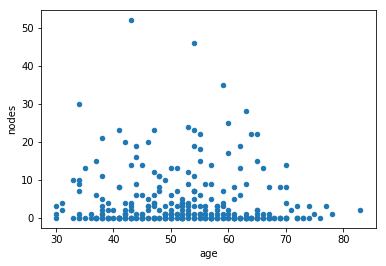

In [5]:
#2-D scatter plot:
#ALWAYS understand the axis: labels and scale.

haberman.plot(kind='scatter', x='age', y='nodes') ;
plt.show()

#cannot make much sense out it. 
#What if we color the points by thier class-label.

In [6]:
#Observation: as the data is having same color it is not easy to differentiate the status data. Hence we go for color coding.

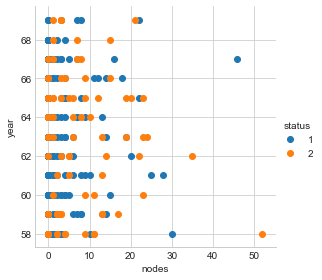

In [7]:
# 2-D Scatter plot with color-coding for each class.
# Here 'sns' corresponds to seaborn. 
sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue="status", size=4) \
   .map(plt.scatter,"nodes", "year") \
   .add_legend();
plt.show();

# Notice that the blue points can be atleast differentiated from the orange even though they cannot be saperated. 
# Can we draw multiple 2-D scatter plots for each combination of features?
# How many cobinations exist? 3C2 = 3

**Observation(s):**
1. It is not much easy to classify the status based on the features and their plots.
2. Seperating the features is much harder as they have considerable overlap.

## 3D Scatter plot

https://plot.ly/pandas/3d-scatter-plots/

Needs a lot to mouse interaction to interpret data.

What about 4-D, 5-D or n-D scatter plot?

#  (3.3) Pair-plot

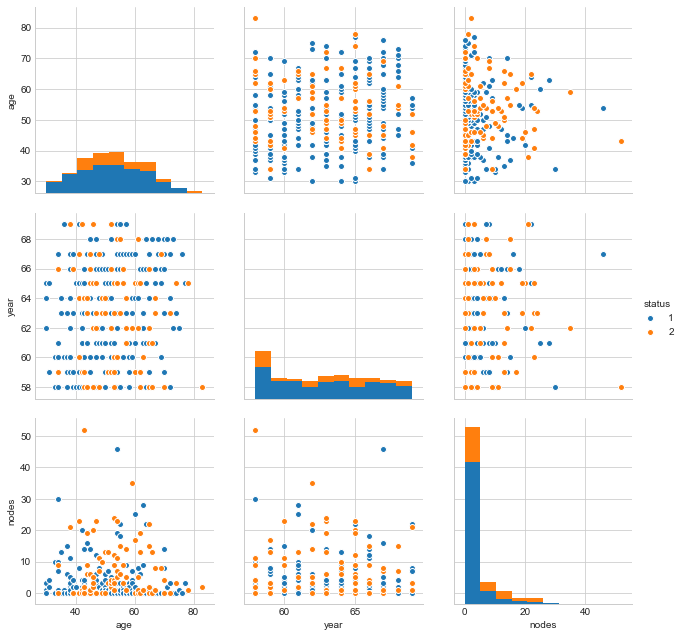

In [8]:
# pairwise scatter plot: Pair-Plot
# Dis-advantages: 
##Can be used when number of features are high.
##Cannot visualize higher dimensional patterns in 3-D and 4-D. 
#Only possible to view 2D patterns.
plt.close();
sns.set_style("whitegrid");
sns.pairplot(haberman, hue="status",vars=["age", "year","nodes"], size=3);
plt.show()
# NOTE: the diagnol elements are PDFs for each feature. PDFs are expalined below.

**Observations**
1. Even here it is a little difficult to understand the data as they are much overlapping.


# (3.4) Histogram, PDF, CDF

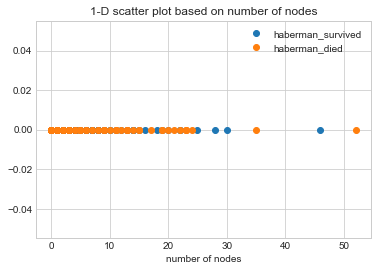

In [9]:
# What about 1-D scatter plot using just one feature?
#1-D scatter plot of nodes
import numpy as np
haberman_survived = haberman.loc[haberman["status"] == 1];
haberman_died = haberman.loc[haberman["status"] == 2];

plt.plot(haberman_survived["nodes"], np.zeros_like(haberman_survived ['nodes']), 'o',label='haberman_survived')
plt.plot(haberman_died["nodes"], np.zeros_like(haberman_died['nodes']), 'o',label='haberman_died')
plt.xlabel('number of nodes')
plt.legend()
plt.title('1-D scatter plot based on number of nodes')
plt.show()
#Disadvantages of 1-D scatter plot: Very hard to make sense as points 
#are overlapping a lot.
#Are there better ways of visualizing 1-D scatter plots?

In [10]:
#observation: 1-d scatter plot doesn't provide much information about the feature.

In [11]:
#Better way of representing the 1-D scater plot by using distributive plots

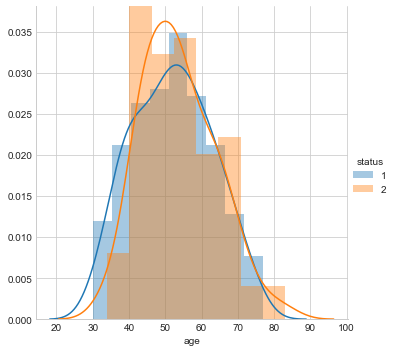

In [12]:
sns.FacetGrid(haberman, hue="status", size=5) \
   .map(sns.distplot, "age") \
   .add_legend();
plt.show();



In [13]:
#Observation: From the above plots we can oobserve that the distributive plot of the feature age.

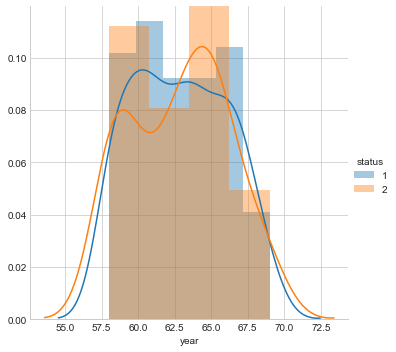

In [14]:
sns.FacetGrid(haberman, hue="status", size=5) \
   .map(sns.distplot, "year") \
   .add_legend();
plt.show();

In [15]:
#Observation: From the above plots we can oobserve that the distributive plot of the feature year.

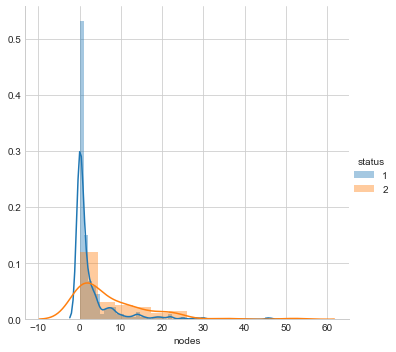

In [16]:
sns.FacetGrid(haberman, hue="status", size=5) \
   .map(sns.distplot, "nodes") \
   .add_legend();
plt.show();

In [17]:
#Observation :(1) It is observed that from the above distributive plots of all the features,
# distributive plot of nodes make a little sence. So let us do further analysis on the feature nodes.
#(2) It is also observer that there are many number of survived people who have less than 5 node values.

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


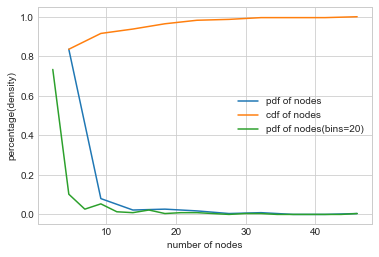

In [18]:
# Histograms and Probability Density Functions (PDF) using KDE
# How to compute PDFs using counts/frequencies of data points in each window.
# Interpreting a PDF
#Plot CDF of nodes

counts, bin_edges = np.histogram(haberman_survived['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='pdf of nodes');
plt.plot(bin_edges[1:], cdf,label='cdf of nodes')


counts, bin_edges = np.histogram(haberman_survived['nodes'], bins=20, 
                                 density = True)
pdf = counts/(sum(counts))
plt.plot(bin_edges[1:],pdf,label='pdf of nodes(bins=20)');
plt.xlabel('number of nodes')
plt.ylabel('percentage(density)')
plt.legend()
plt.show();


In [19]:
#Observation: It is observed that approximately 83% of the nodes are having values less than 5.

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


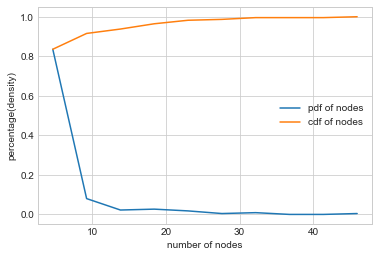

In [20]:
# Need for Cumulative Distribution Function (CDF)
# We can visually see what percentage of survived patient's have nodes of less than n.

#Plot CDF of petal_length

counts, bin_edges = np.histogram(haberman_survived['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='pdf of nodes')
plt.plot(bin_edges[1:], cdf,label='cdf of nodes')
plt.xlabel('number of nodes')
plt.ylabel('percentage(density)')
plt.legend()



plt.show();

In [1]:
#Observation: It is observed that approximately 90% of the nodes are having values less than 10.

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


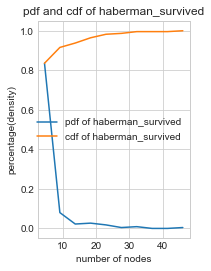

[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


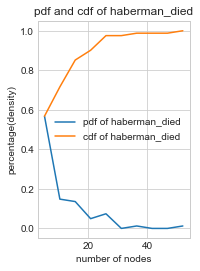

In [22]:
# Plots of CDF of nodes for various types of status.

# haberman_survived

counts, bin_edges = np.histogram(haberman_survived['nodes'],bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.figure(1)
plt.subplot(1,2,1)
plt.plot(bin_edges[1:],pdf,label='pdf of haberman_survived')
plt.plot(bin_edges[1:], cdf,label='cdf of haberman_survived')
plt.xlabel('number of nodes')
plt.ylabel('percentage(density)')
plt.title('pdf and cdf of haberman_survived')
plt.legend()

plt.show()


# haberman_died
counts, bin_edges = np.histogram(haberman_died['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.figure(1)
plt.subplot(1,2,1)
plt.plot(bin_edges[1:],pdf,label='pdf of haberman_died')
plt.plot(bin_edges[1:], cdf,label='cdf of haberman_died')
plt.xlabel('number of nodes')
plt.ylabel('percentage(density)')
plt.title('pdf and cdf of haberman_died')
plt.legend()

plt.show()



In [23]:
#Observation: It is observed that approximately 83% of the nodes with values less than 4.6 have the status as survived.
#It is also observed that approximately 60% of the nodes with values greater than 5.2 have status as died.

# (3.5) Mean, Variance and Std-dev

In [24]:
#Mean, Variance, Std-deviation,  
print("Means:")
print(np.mean(haberman_survived['nodes']))
print(np.mean(haberman_died['nodes']))
#Mean with an outlier.
print(np.mean(np.append(haberman_survived['nodes'],50)));


print("\nStd-dev:");
print(np.std(haberman_survived['nodes']))
print(np.std(haberman_died['nodes']))





Means:
2.7911111111111113
7.45679012345679
3.0

Std-dev:
5.857258449412131
9.128776076761632


# (3.6) Median, Percentile, Quantile, IQR, MAD

In [25]:
#Median, Quantiles, Percentiles, IQR.
print("\nMedians:")
print(np.median(haberman_survived['nodes']))
print(np.median(haberman_died['nodes']))
#Median with an outlier
print(np.median(np.append(haberman_survived['nodes'],50)));


print("\nQuantiles:")
print(np.percentile(haberman_survived['nodes'],np.arange(0, 100, 25)))
print(np.percentile(haberman_died['nodes'],np.arange(0, 100, 25)))

print("\n90th Percentiles:")
print(np.percentile(haberman_survived['nodes'],90))
print(np.percentile(haberman_died['nodes'],90))


from statsmodels import robust
print ("\nMedian Absolute Deviation")
print(robust.mad(haberman_survived['nodes']))
print(robust.mad(haberman_died['nodes']))




Medians:
0.0
4.0
0.0

Quantiles:
[0. 0. 0. 3.]
[ 0.  1.  4. 11.]

90th Percentiles:
8.0
20.0

Median Absolute Deviation
0.0
5.930408874022408


# (3.7) Box plot and Whiskers

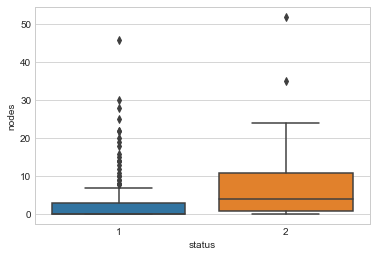

In [26]:

#Box-plot with whiskers: another method of visualizing the  1-D scatter plot more intuitivey.

#NOTE: IN the plot below, a technique call inter-quartile range is used in plotting the whiskers. 
#Whiskers in the plot below donot correposnd to the min and max values.

#Box-plot can be visualized as a PDF on the side-ways.

sns.boxplot(x='status',y='nodes', data=haberman)
plt.show()

In [27]:
#Observation: It is observed that most of the haberman_surived data lie below 3 nodes.
# it is also observed that more number of nodes will lead to increace in haberman_dead count.

# (3.11) contour plot.


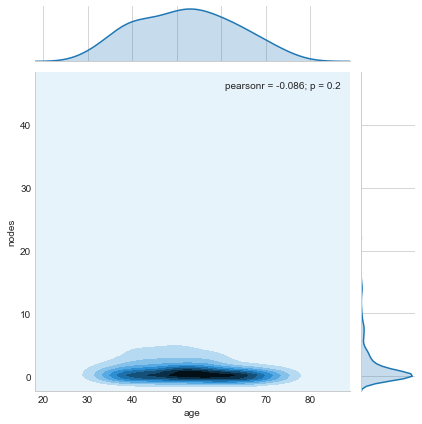

In [28]:
#2D Density plot, contors-plot for haberman_survived data
sns.jointplot(x="age", y="nodes", data=haberman_survived, kind="kde");
plt.show();


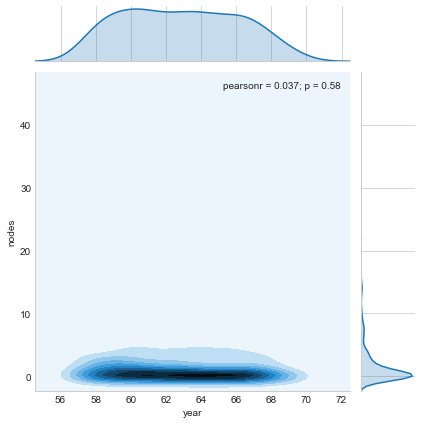

In [29]:
sns.jointplot(x="year", y="nodes", data=haberman_survived, kind="kde");
plt.show();


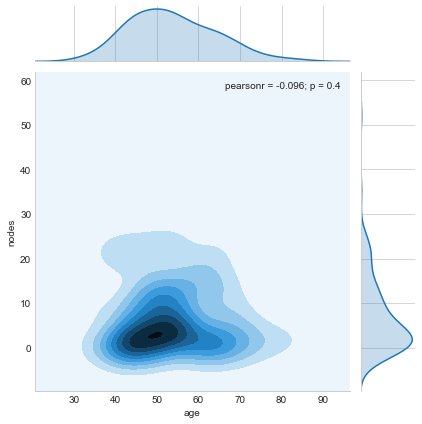

In [30]:
#2D Density plot, contors-plot for haberman_died data
sns.jointplot(x="age", y="nodes", data=haberman_died, kind="kde");
plt.show();


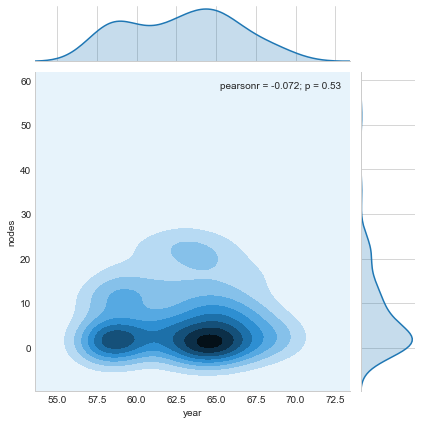

In [31]:
sns.jointplot(x="year", y="nodes", data=haberman_died, kind="kde");
plt.show();

In [32]:
# WHOLE OBSERVATION (including the contour plots): 
#(1)From the above analysis , it is approximately understood that people between
#  age 40-60, operation year between 57-60 and 62-67.5 and nodes above 4 mostly tend to get affected by cancer and die.

#(2) It is also understood that people between age 40-60, operation year between 58-68, nodes below 4 are cured
# form cancer and have more chances of surviving or have survived.

#(3) It is observed that approximately 83% of the nodes with values less than 4.6 have the status as survived.
#It is also observed that approximately 60% of the nodes with values greater than 5.2 have status as died.


In [ ]:
#-----------------------------------------------END----------------------------------------------------------------------------------------------------------

In [ ]:
#---------------------------------------------------------------------------END----------------------------------------------------------------------------------------------------------

In [ ]:
#---------------------------------------------------------------------------END----------------------------------------------------------------------------------------------------------

In [ ]:
#-----------------------------------------------END----------------------------------------------------------------------------------------------------------

In [ ]:
#-----------------------------------------------------------------------------END----------------------------------------------------------------------------------------------------------

In [ ]:
#------------------------------------------------------------------------------END----------------------------------------------------------------------------------------------------------

In [ ]:
#-----------------------------------------------------------------------------END----------------------------------------------------------------------------------------------------------

In [ ]:
#----------------------------------------------------------------------------END----------------------------------------------------------------------------------------------------------

In [ ]:
#-----------------------------------------------------------------------------END----------------------------------------------------------------------------------------------------------

In [ ]:
#-------------------------------------------------------------------------------END----------------------------------------------------------------------------------------------------------

In [ ]:
#-----------------------------------------------------------------------------END----------------------------------------------------------------------------------------------------------